In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("iris.csv")

print("Total datos: ", len(df))

df.head()

Total datos:  150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [52]:
df.isnull().values.any()

False

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


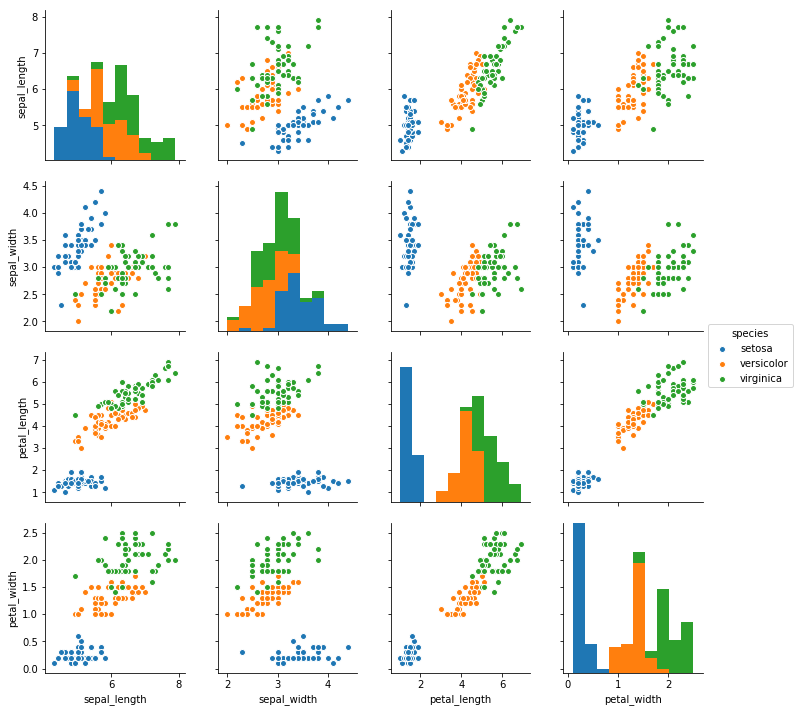

In [21]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
import seaborn as sns

sns.pairplot(df, hue="species")

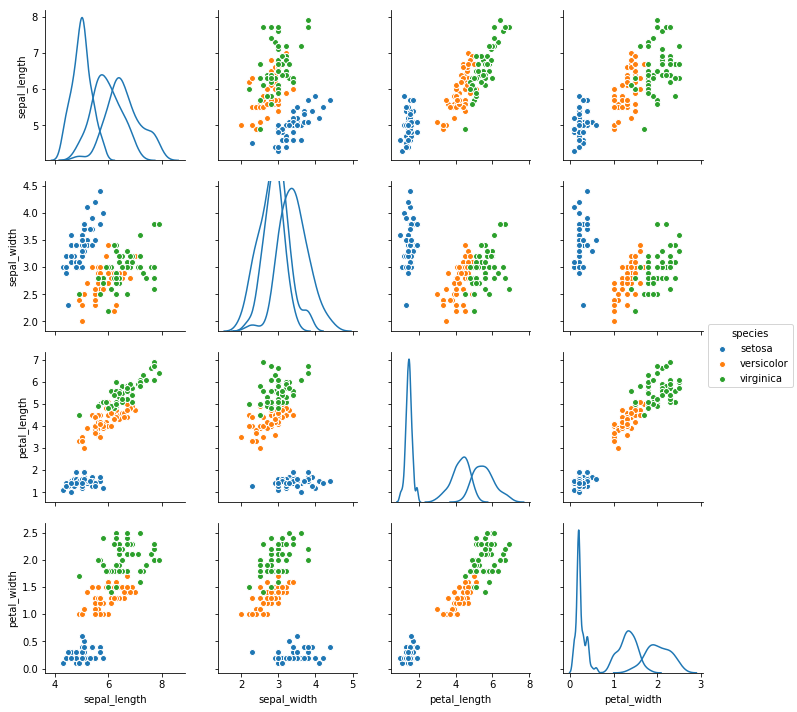

In [22]:
sns.pairplot(df, hue="species",diag_kind="kde")

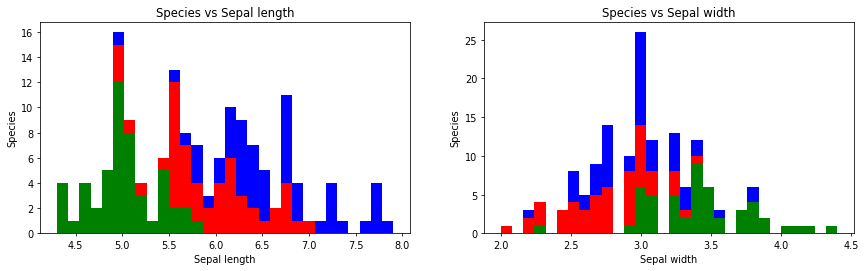

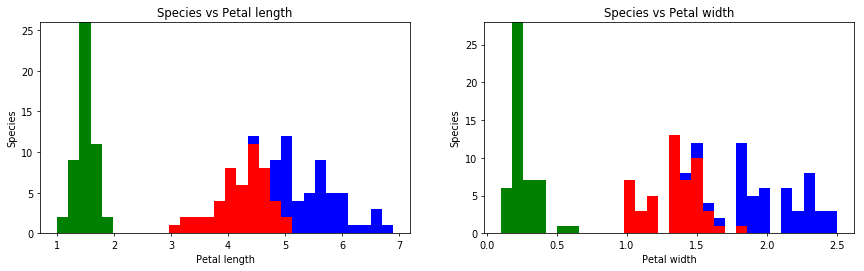

In [25]:
#Primer par de graficos# 

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Species vs Sepal length")
plt.xlabel("Sepal length")
plt.ylabel("Species")

plt.hist([df[df['species']=='setosa']['sepal_length'],df[df['species']=='versicolor']['sepal_length'],df[df['species']=='virginica']['sepal_length']], stacked=True, color = ['g','r','b'],
         bins = 30, label = ['setosa','versicolor','virginica'])

plt.subplot(1,2,2)
plt.title("Species vs Sepal width")
plt.xlabel("Sepal width")
plt.ylabel("Species")

plt.hist([df[df['species']=='setosa']['sepal_width'],df[df['species']=='versicolor']['sepal_width'],df[df['species']=='virginica']['sepal_width']], stacked=True, color = ['g','r','b'],
         bins = 30, label = ['setosa','versicolor','virginica'])
plt.show()

#Segundo par de graficos

plt.figure(figsize=(15, 4), dpi=70)
plt.subplot(1,2,1)
plt.title("Species vs Petal length")
plt.xlabel("Petal length")
plt.ylabel("Species")

plt.hist([df[df['species']=='setosa']['petal_length'],df[df['species']=='versicolor']['petal_length'],df[df['species']=='virginica']['petal_length']], stacked=True, color = ['g','r','b'],
         bins = 30, label = ['setosa','versicolor','virginica'])

plt.subplot(1,2,2)
plt.title("Species vs Petal width")
plt.xlabel("Petal width")
plt.ylabel("Species")

plt.hist([df[df['species']=='setosa']['petal_width'],df[df['species']=='versicolor']['petal_width'],df[df['species']=='virginica']['petal_width']], stacked=True, color = ['g','r','b'],
         bins = 30, label = ['setosa','versicolor','virginica'])
plt.show()

In [9]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
df2 = pd.DataFrame(data=df)

df2['species'] = df2['species'].replace(['setosa'],1)
df2['species'] = df2['species'].replace(['versicolor'],2)
df2['species'] = df2['species'].replace(['virginica'],3)

In [27]:
df2['species'].unique()

array([1, 2, 3])

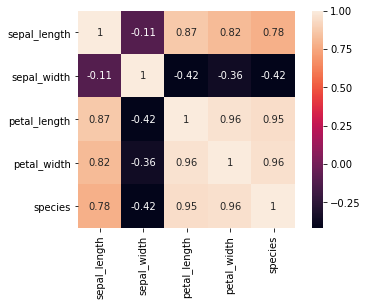

In [28]:
sns.heatmap(df2.corr(), square = True, annot = True)

# Modelo predictivo

In [64]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data=df['species'])

X = pd.DataFrame(data=df.ix[:,0:4])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [65]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

print (X_train.shape, y_train.shape) 
print (X_test.shape, y_test.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


In [66]:
y_test.head()

,species
121,virginica
46,setosa
45,setosa
15,setosa
12,setosa


In [69]:
lm = LogisticRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

predictions

/home/spawnqq/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor'], dtype=object)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)

confusion_matrix

array([[13,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  9]])

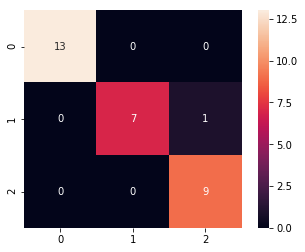

In [71]:
sns.heatmap(confusion_matrix, square = True, annot = True)

In [73]:
print ("Score:", model.score(X_test, y_test))

Score: 0.9666666666666667


In [74]:
from sklearn.tree import DecisionTreeClassifier

clf =  DecisionTreeClassifier ()
clf.fit(X_train, y_train)
C = clf.feature_importances_
for i in range(len((C))):
    print(X.columns[i], ': ', round(C[i]*100,2))

sepal_length :  1.67
sepal_width :  1.25
petal_length :  4.86
petal_width :  92.21


In [77]:
prom_setalo = 0
prom_versicolor = 0
prom_virginica = 0

pred_setalo = 0
pred_versicolor = 0
pred_virginica = 0

for i in range(len(predictions)):
    if predictions[i] == 'setalo':
        pred_setalo = pred_setalo + 1
    elif predictions[i] == 'versicolor':
        pred_versicolor = pred_versicolor + 1
    elif predictions[i] == 'virginica':
        pred_virginica = pred_virginica + 1
        
    if y_test['species'].iloc[i] == 'setalo':
        prom_setalo = prom_setalo + 1
    elif y_test['species'].iloc[i] == 'versicolor':
        prom_versicolor = prom_versicolor + 1
    elif y_test['species'].iloc[i] == 'virginica':
        prom_virginica = prom_virginica + 1    
        


#tasa_error = ((prom - pred) / prom) * 100

print("Real promedio Setalo: ",round(prom_setalo, 2))
print("Real promedio Versicolor: ",round(prom_versicolor, 2))
print("Real promedio Virginica: ",round(prom_virginica, 2))

print("Predicciones Setalo: ",round(pred_setalo, 2))
print("Predicciones Versicolor: ",round(pred_versicolor, 2))
print("Predicciones Virginica: ",round(pred_virginica, 2))

Real promedio Setalo:  0
Real promedio Versicolor:  8
Real promedio Virginica:  9
Predicciones Setalo:  0
Predicciones Versicolor:  7
Predicciones Virginica:  10


In [ ]:
plt.figure(figsize=(15, 4), dpi=70)
plt.title("Species vs Sepal length")
plt.xlabel("Sepal length")
plt.ylabel("Species")

plt.hist([y=[prom_setalo,prom_versicolor,prom_virginica],y=[pred_setalo,pred_versicolor,pred_virginica]], stacked=True, color = ['g','r'],
         bins = 30, label = ['promedio','prediccion'])

plt.show()